In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
iris = pd.read_csv('D:\Learning\Applied_AI\iris_data.csv')
iris.shape
col_list = iris.columns
print(type(col_list))
print(col_list[:])
iris['species'].value_counts()
iris_data = iris.iloc[:,0:4] # select all the rows and col indices 0 to 3
iris_lables = iris.iloc[:,4:] # select all trhe rows and 4th cloumn
iris_data.shape
iris_data.head(2)


<class 'pandas.core.indexes.base.Index'>
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [3]:
iris_lables.shape
iris_lables.head(2)

,species
0,Iris-setosa
1,Iris-setosa


In [4]:
#standardizing using manually
print(iris_data.mean())
print(iris_data.std())
print(np.mean(iris_data))
iris_standard_manual = ((iris_data - iris_data.mean())/iris_data.std())
iris_standard_manual.head(3)

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593


In [6]:
#standardizing using sklearn pre-processing
iris_standard = StandardScaler().fit_transform(iris_data)  # this has transformed dataframe to numpy N-dimensional array,
#each row in df is a list we will have n inner lists in a outer list,thats why length of iris_standard is 150 and 
#length of each inner list is 4.
print('length of iris_standard is ',len(iris_standard))
print('length of inner list is',len(iris_standard[0]))
print('sample elements are')
print((iris_standard[0:3]))

length of iris_standard is  150
length of inner list is 4
sample elements are
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]]


In [7]:
iris_standard.mean(axis=0) # axis = 0 is at column level,we could see even though we applie standard scalar
#mean is not exactly zero.This is because of float values.if we had integers it would have become exact Zero.
iris_standard_mean = np.mean(iris_standard,axis=0)
iris_standard_stdev = np.std(iris_standard,axis=0)
print(iris_standard_mean)
print(iris_standard_stdev)

[-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
[1. 1. 1. 1.]


In [8]:
# we will try to indetify covariance matrix for iris_standard using manual calculation
# diagonal elements indicate variance of teh each field.means,1.00671141 is variance of sepal_length,
#1.00671141 is variance of sepal-width..etc.
# to cross check we can do sq_root of variance should become stddev it should be close.
#second element of first row is the covvar between sepal_length and sepal_width....etc.
cov_mat_manual = (iris_standard - iris_standard_mean).T.dot((iris_standard - iris_standard_mean)) / (iris_standard.shape[0]-1)
print(cov_mat_manual)


[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [9]:
# we will try to indetify covariance matrix for iris_standard using inbuilt functions
#we could observe that sepal_length and petal_length has maximum positive covariance(0.87760486)
#followed by sepal_length and petal-width (0.82344326)
cov_mat = np.cov(iris_standard.T)
print(cov_mat)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [10]:
#once we got covariance matrix,we need to identify eigen values and eigen vector for this.
# eigen_values tell us the axis with maximum variability
#eigen vector is the vector in the direction with maximum variability.
#here we have 2.93035378 and 0.92740362 as maximum eigen values. in case we want to choose 90% variability,
#if we do (2.93035378+0.92740362)/(2.93035378+ 0.92740362+ 0.14834223+ 0.02074601) = 0.958009754 so, is accumulating to 95% variability.
#so, we can safely assume if we just take first two principle components we can retain 95% variability.
#in eig_vecs, first element fo every inner list corresponds to first eigen value in eig_vals,
#means 0.52237162,-0.26335492,0.58125401,0.56561105 correspond to eig_val of 2.93035378.
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vecs)
print(eig_vals)


[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
[2.93035378 0.92740362 0.14834223 0.02074601]


In [11]:
#construct eigen pairs
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)

[(2.9303537755893165, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.9274036215173417, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.1483422264816399, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.02074601399559571, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]


4.026845637583894
[0.7277045209380134, 0.23030523267680644, 0.03683831957627389, 0.005151926808906267]


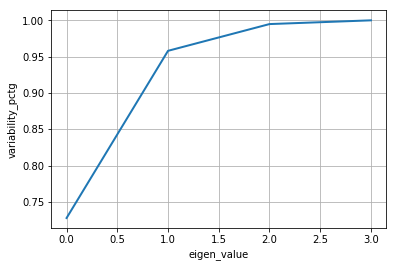

In [44]:
#we can plot a graph to explain variability of eigen values.
# if we observe the graph, at 0.0 on x,y is about 0.72,means just one variable itself is  explaining about 72% variabiliy,
#if we combine first two elements we can get about >95% variability.
total_eigenvals = sum(eig_vals)
print(total_eigenvals)

variability_pctg = [(i / total_eigenvals) for i in sorted(eig_vals, reverse=True)]
print(variability_pctg)
cum_var_exp = np.cumsum(variability_pctg)
plt.plot(cum_var_exp,linewidth=2);
plt.xlabel('eigen_value')
plt.ylabel('variability_pctg')
plt.grid()
plt.show()

In [40]:
#once we have final eigen_pairs, we need to construct 4 X 2 matrix,which will have eigen vectors for first two principle components.
#then we need to multiply our original matrix with this matrix.
#reshape converts the array to 4 X 1.So, we will have two 4 X 1 vectors.hstack stacks them horizontally.means side by side.
#So, finally we will get 4 X 2 matrix. This is called projection matrix
projection_matrix = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print(projection_matrix)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [41]:
#once we have projection matrix, we need to dot product of our original standardized matrix with projection matrix to get principle
# components.Here we get two principle components.
principle_matrix = iris_standard.dot(projection_matrix)
principle_matrix[0:6]
#principle_matrix.shape

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731],
       [-2.30419716,  0.57536771],
       [-2.38877749, -0.6747674 ],
       [-2.07053681, -1.51854856]])

In [42]:
#Now, if we standardize and find cov between these two principle components, we should see very less covariance.
#But,Still we got 8.86 as negative covariance.So, even with one principle component we could predict.
principle_std = StandardScaler().fit_transform(principle_matrix)
principle_cov_mat = np.cov(principle_std.T)
print(principle_cov_mat)

[[ 1.00671141e+00 -8.86514100e-17]
 [-8.86514100e-17  1.00671141e+00]]


       species
0  Iris-setosa
1  Iris-setosa


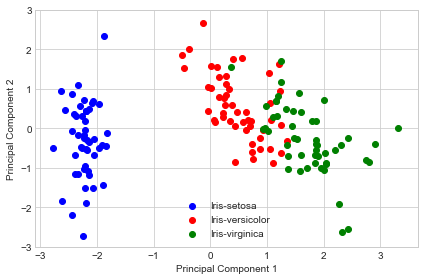

In [43]:
#principle_matrix[iris_lables['species']==lab, 0] - iris_lables['species']==lab gives index from iris_lables where species = lab is true 
#if ir returns index = 1,then we are taking first values from two dimensional array principle_matrix[1,0] as x value 
#and principle_matrix[1,1] as y value for plotting.

print(iris_lables.head(2))
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(principle_matrix[iris_lables['species']==lab, 0],
                    principle_matrix[iris_lables['species']==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [29]:
#instead of lengthy procedure we can do PCA using default methods available in sklearn.
#n_components=2 signifies we need two principle components

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
principle_matrix_sklearn = sklearn_pca.fit_transform(iris_standard)

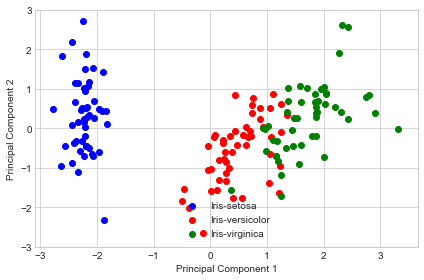

In [58]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(principle_matrix_sklearn[iris_lables['species']==lab,0],
                    principle_matrix_sklearn[iris_lables['species']==lab,1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()
#plot size did not match with earlier plot, where we selected principle componets,need to analyze this.

# T-SNE

[[-12.572178 -25.27428 ]
 [-11.181869 -21.646711]]
length of tsne_data is  150
length of tsne_data is  2


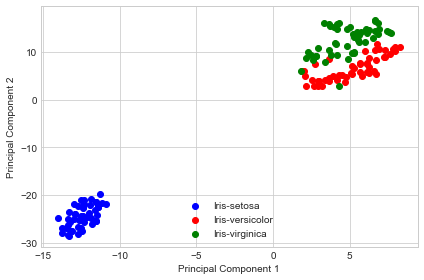

In [50]:
#using T-SNE on IRIS Dataset.

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(iris_standard)
print(tsne_data[0:2]) #each list ia row with two column data
print('length of tsne_data is ',len(tsne_data))
tsne_data_t = tsne_data.T
print('length of tsne_data is ',len(tsne_data_t))

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(tsne_data[iris_lables['species']==lab, 0],
                    tsne_data[iris_lables['species']==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


In [60]:
xy = tsne_data[iris_lables['species']=='Iris-setosa',1]
print(xy)

[-25.27428  -21.646711 -22.541714 -21.75289  -25.653273 -27.487585
 -23.435606 -24.323322 -20.748482 -22.391487 -26.767233 -23.861341
 -21.496227 -20.974277 -28.122488 -28.605774 -27.513695 -25.25895
 -27.499432 -26.78135  -25.35897  -26.240103 -24.75881  -24.153252
 -23.839397 -21.912006 -24.411772 -25.543427 -24.854952 -22.591936
 -22.111279 -25.350077 -27.885643 -28.283667 -22.390978 -23.125193
 -26.08351  -22.391172 -21.108383 -24.593473 -24.966076 -19.723852
 -21.846294 -25.017555 -26.82189  -21.448982 -26.799507 -22.281534
 -26.596804 -23.694792]
